In [1]:
# Imports and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline  

df = pd.read_csv(r"D:\project 2\Expenses and Income Prediction\data\anz.csv\anz.csv")
df.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [2]:
# Basic info about the dataset
print("shape(rows,column):", df.shape)
print("\ncolumn:",df.columns)
print("\ninfo:",df.info)
print("\ndescribe (numeric columns):",df.describe)



shape(rows,column): (12043, 23)

column: Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

info: <bound method DataFrame.info of            status  card_present_flag bpay_biller_code         account  \
0      authorized                1.0              NaN  ACC-1598451071   
1      authorized                0.0              NaN  ACC-1598451071   
2      authorized                1.0              NaN  ACC-1222300524   
3      authorized                1.0              NaN  ACC-1037050564   
4      authorized                1.0              NaN  ACC-1598451071   
...           ...                ...              ...             ...   
12038  authorized  

In [3]:
# Missing values check

missing = df.isna().sum().sort_values(ascending=False)
print(missing)

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
txn_description          0
long_lat                 0
currency                 0
account                  0
status                   0
date                     0
balance                  0
first_name               0
age                      0
gender                   0
amount                   0
extraction               0
transaction_id           0
country                  0
customer_id              0
movement                 0
dtype: int64


In [4]:
# Basic categorical distributions
print("Unique movement values (debit/credit etc.):")
print(df["movement"].value_counts(dropna=False))

print("\nUnique currency values:")
print(df["currency"].value_counts(dropna=False))

print("\nTransaction description counts:")
print(df["txn_description"].value_counts().head(10))

Unique movement values (debit/credit etc.):
movement
debit     11160
credit      883
Name: count, dtype: int64

Unique currency values:
currency
AUD    12043
Name: count, dtype: int64

Transaction description counts:
txn_description
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: count, dtype: int64


In [5]:
#  Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])
print(df["date"].dtype)
print("Date range:", df["date"].min(), "to", df["date"].max())

datetime64[ns]
Date range: 2018-08-01 00:00:00 to 2018-10-31 00:00:00


In [6]:
# Numeric sanity checks 

numeric_cols = ["amount", "balance", "age"]
for col in numeric_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print("  Min:", df[col].min())
        print("  Max:", df[col].max())
        print("  Mean:", df[col].mean())
        print("  Std:", df[col].std())



Column: amount
  Min: 0.1
  Max: 8835.98
  Mean: 187.93358797641784
  Std: 592.5999338972956

Column: balance
  Min: 0.24
  Max: 267128.52
  Mean: 14704.195553433528
  Std: 31503.72265226303

Column: age
  Min: 18
  Max: 78
  Mean: 30.5823299842232
  Std: 10.046343038910202


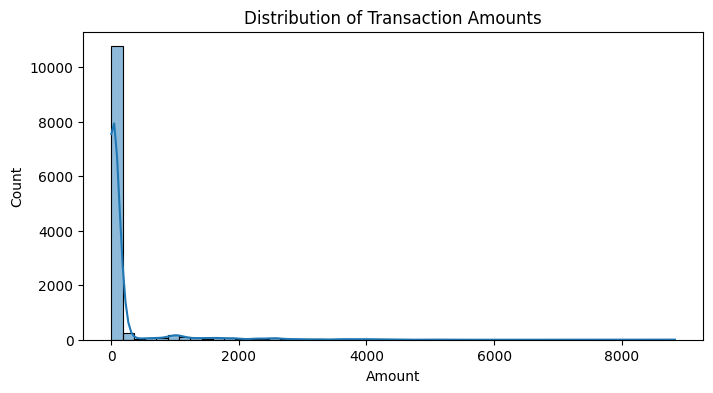

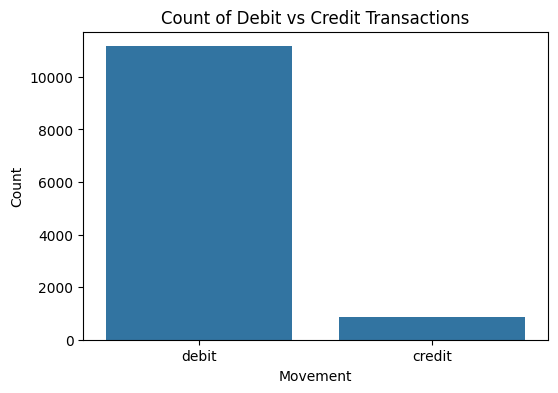

In [7]:
# Simple visualizations 

# 1. Distribution of transaction amount
plt.figure(figsize=(8, 4))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

# 2. Debit vs Credit count
plt.figure(figsize=(6, 4))
sns.countplot(x="movement", data=df)
plt.title("Count of Debit vs Credit Transactions")
plt.xlabel("Movement")
plt.ylabel("Count")
plt.show()


In [8]:
# Remove duplicates and Ensures amount are numeric 

df = df.drop_duplicates()

df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
print("Amount dtype after:", df["amount"].dtype)
print("Number of NaNs in amount after conversion:", df["amount"].isna().sum())


Amount dtype after: float64
Number of NaNs in amount after conversion: 0


In [9]:
# Save cleaned dataset
cleaned_path = r"D:\project 2\Expenses and Income Prediction\data\anz_cleaned.cs"
df.to_csv(cleaned_path, index=False)

print("Cleaned data saved to:", cleaned_path)


Cleaned data saved to: D:\project 2\Expenses and Income Prediction\data\anz_cleaned.cs
